In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
df = pd.read_json("008_results.jsonl", orient="records", lines=True)
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"], row["y_pred"]), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"], row["y_pred"], average="macro"), axis=1)

In [9]:
print(df.loc[df.output_column=="Speaker_gender", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean().to_latex())

\begin{tabular}{llrr}
\toprule
                    &    &  accuracy &   macroF1 \\
eval\_file & clip\_seconds &           &           \\
\midrule
001\_gender\_dev.csv & -1 &    0.9940 &  0.994000 \\
                    &  2 &    1.0000 &  1.000000 \\
001\_gender\_test.csv & -1 &    0.9970 &  0.997000 \\
                    &  2 &    0.9895 &  0.989499 \\
\bottomrule
\end{tabular}



In [10]:
print(df.loc[df.output_column=="Speaker_name", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean().to_latex())

\begin{tabular}{llrr}
\toprule
                                     &    &  accuracy &   macroF1 \\
eval\_file & clip\_seconds &           &           \\
\midrule
003\_speaker\_id\_dev\_for\_datasets.csv & -1 &     0.992 &  0.991667 \\
                                     &  2 &     0.738 &  0.703877 \\
003\_speaker\_id\_test\_for\_datasets.csv & -1 &     0.998 &  0.997995 \\
                                     &  2 &     0.806 &  0.784407 \\
\bottomrule
\end{tabular}



In [18]:
y_true, y_pred = df.loc[5, ["y_true", "y_pred"]]


In [22]:
df.loc[5, :]

output_column                                              Speaker_name
model_name_or_path    models/facebook_wav2vec2-large-slavic-voxpopul...
eval_file                          003_speaker_id_test_for_datasets.csv
clip_seconds                                                          2
y_true                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
y_pred                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
accuracy                                                          0.806
macroF1                                                        0.784407
Name: 5, dtype: object

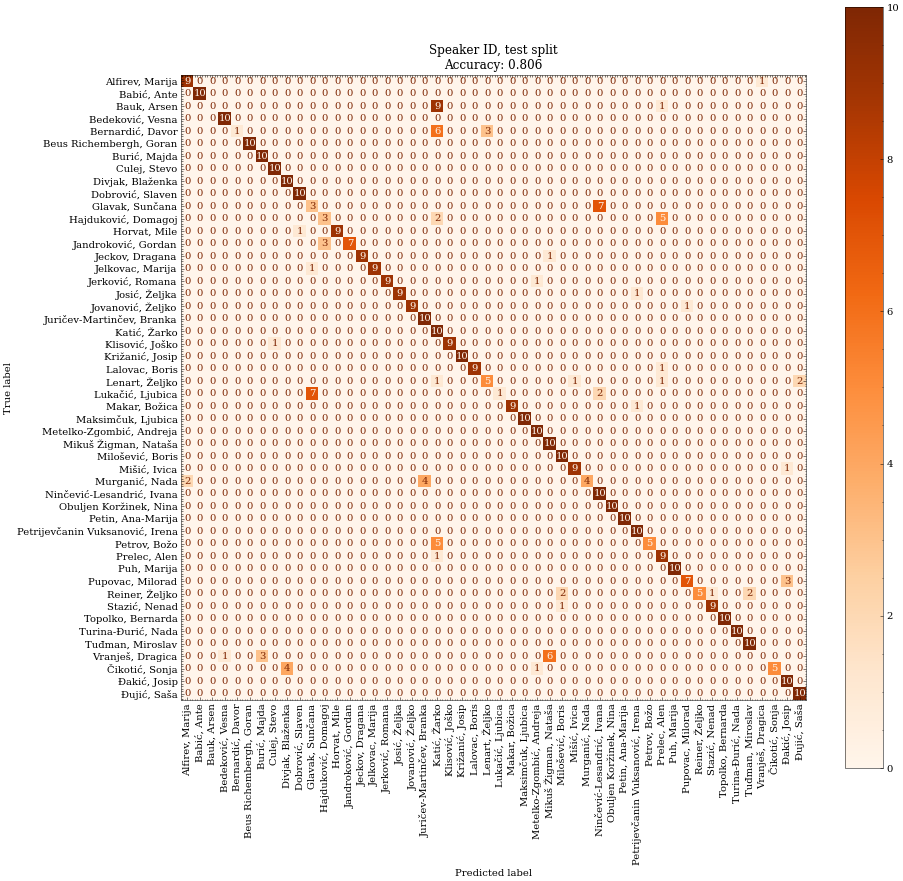

In [25]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(14,14))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=90)
plt.title("Speaker ID, test split\nAccuracy: 0.806")
plt.savefig("images/009_cm_speaker_id_test.png")
plt.savefig("images/009_cm_speaker_id_test.pdf")
plt.show()